## TITANIC DATASET

In [1]:
! cd data ; wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2020-06-11 09:34:27--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  43.19K   265KB/s    in 0.2s    

2020-06-11 09:34:27 (265 KB/s) - ‘titanic.csv.1’ saved [44225/44225]



-------

### Import data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from seaborn import heatmap
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

In [3]:
titanic = pd.read_csv('data/titanic.csv', sep=',', infer_datetime_format=False)

### First EDA

In [4]:
print('N. osservazioni: %d' % (titanic.shape[0], ))
print('N. features: %d' % (titanic.shape[1], ))

N. osservazioni: 887
N. features: 8


In [5]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


In [6]:
titanic.columns = ['survived', 'class', 'name', 'sex', 'age', 'siblings', 'children', 'fare']

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  887 non-null    int64  
 1   class     887 non-null    int64  
 2   name      887 non-null    object 
 3   sex       887 non-null    object 
 4   age       887 non-null    float64
 5   siblings  887 non-null    int64  
 6   children  887 non-null    int64  
 7   fare      887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [8]:
titanic.isnull().sum(axis = 0)

survived    0
class       0
name        0
sex         0
age         0
siblings    0
children    0
fare        0
dtype: int64

Distribuszione della variabile target: 0 - Morto / 1 - Sopravvissuto
-----
0    545
1    342
Name: survived, dtype: int64
-----


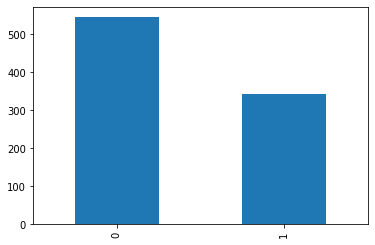

In [9]:
print('Distribuszione della variabile target: 0 - Morto / 1 - Sopravvissuto')
print('-----')
print(titanic['survived'].value_counts())
print('-----')
(titanic['survived'].value_counts()).plot.bar()

Distribuszione della variabile Pclass [class], rispetto alla variabile target: {1a classe, 2a classe, 3a classe}
-----
class       1   2    3
survived              
0          80  97  368
1         136  87  119
=====
Distribuszione della variabile Sex [sex], rispetto alla variabile target: {male, female}
-----
sex       female  male
survived              
0             81   464
1            233   109
=====
Distribuszione della variabile Siblings/Spouses Aboard [siblings], rispetto alla variabile target
-----
siblings    0    1   2   3   4  5  8
survived                            
0         394   97  15  12  15  5  7
1         210  112  13   4   3  0  0
=====
Distribuszione della variabile Parents/Children Aboard [children], rispetto alla variabile target
-----
children    0   1   2  3  4  5  6
survived                         
0         441  53  40  2  4  4  1
1         233  65  40  3  0  1  0
=====


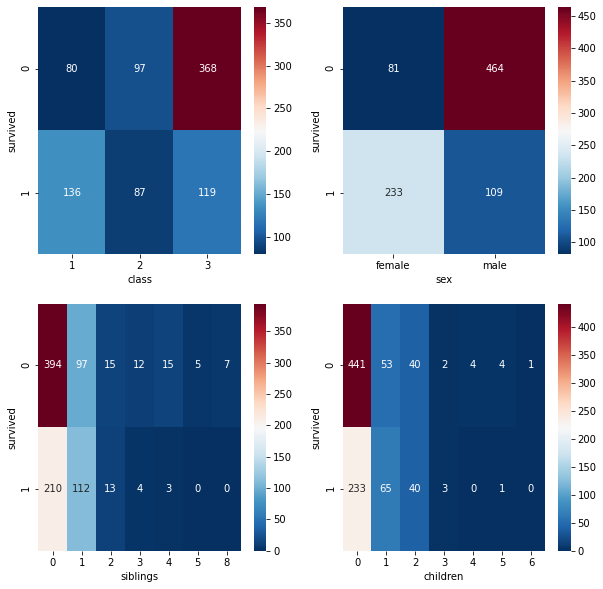

In [10]:
print('Distribuszione della variabile Pclass [class], rispetto alla variabile target: {1a classe, 2a classe, 3a classe}')
print('-----')
class_ct = pd.crosstab(index = titanic['survived'], columns = titanic['class'])
print(class_ct)
print('=====')
print('Distribuszione della variabile Sex [sex], rispetto alla variabile target: {male, female}')
print('-----')
sex_ct = pd.crosstab(index = titanic['survived'], columns = titanic['sex'])
print(sex_ct)
print('=====')
print('Distribuszione della variabile Siblings/Spouses Aboard [siblings], rispetto alla variabile target')
print('-----')
siblings_ct = pd.crosstab(index = titanic['survived'], columns = titanic['siblings'])
print(siblings_ct)
print('=====')
print('Distribuszione della variabile Parents/Children Aboard [children], rispetto alla variabile target')
print('-----')
parents_ct = pd.crosstab(index = titanic['survived'], columns = titanic['children'])
print(parents_ct)
print('=====')



fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 10))

ax1 = sn.heatmap(class_ct, 
           annot=True,
           fmt = '.0f',
           ax = ax1,
           cmap = 'RdBu_r')

ax2 = sn.heatmap(sex_ct, 
           annot=True,
           fmt = '.0f', 
           ax = ax2,
           cmap = 'RdBu_r')

ax3 = sn.heatmap(siblings_ct, 
           annot=True,
           fmt = '.0f',
           ax = ax3,
           cmap = 'RdBu_r')

ax4 = sn.heatmap(parents_ct, 
           annot=True,
           fmt = '.0f', 
           ax = ax4,
           cmap = 'RdBu_r')


In [11]:
print('Rimuovo le colonne non utili: Name')
titanic = titanic.drop('name', axis=1)
titanic.head()

Rimuovo le colonne non utili: Name


,survived,class,sex,age,siblings,children,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [12]:
print('Rimappo class per renderla categorica')
titanic = titanic.replace({'class':{1: '_1', 2: '_2', 3: '_3'}})

Rimappo class per renderla categorica


In [13]:
print('Trasformo in dummy le variabili categoriche: sex, class')
titanic = pd.get_dummies(titanic)
titanic.head()

Trasformo in dummy le variabili categoriche: sex, class


,survived,age,siblings,children,fare,class__1,class__2,class__3,sex_female,sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,1


In [14]:
print('Rimuovo le colonne per evitare collinearità: sex_female, class__1')
titanic = titanic.drop(['sex_male', 'class__1'], axis=1)
titanic.head()

Rimuovo le colonne per evitare collinearità: sex_female, class__1


,survived,age,siblings,children,fare,class__2,class__3,sex_female
0,0,22.0,1,0,7.2500,0,1,0
1,1,38.0,1,0,71.2833,0,0,1
2,1,26.0,0,0,7.9250,0,1,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,0,1,0


In [15]:
y = titanic.survived
X = titanic.drop('survived', axis = 1)

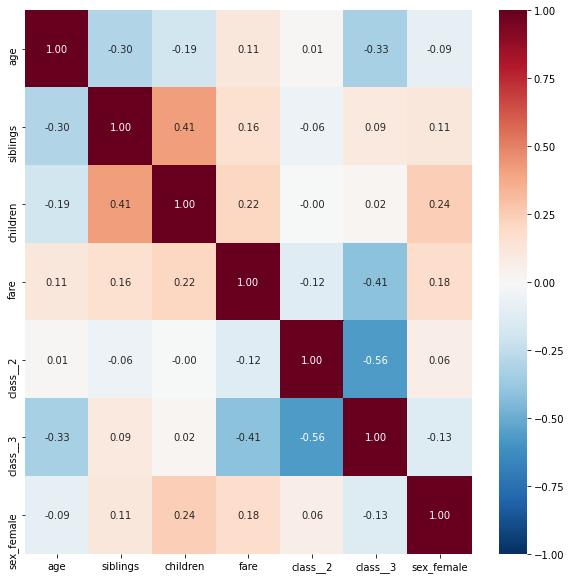

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = heatmap(
    X.corr(), 
    fmt = '.2f', 
    annot = True, 
    ax = ax, 
    cmap = 'RdBu_r',
    vmin = -1, 
    vmax = 1)

In [17]:
print("""
Il metodo della t-sne mostra che i dati sono separabili in 3 gruppi, in due si vede bene la classe di riferimento, mentre nella terza è poco nota
""")


Il metodo della t-sne mostra che i dati sono separabili in 3 gruppi, in due si vede bene la classe di riferimento, mentre nella terza è poco nota



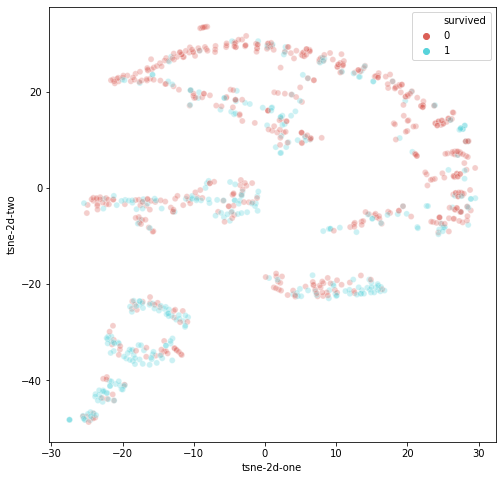

In [18]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X)
titanic_tsne = titanic.copy()

titanic_tsne['tsne-2d-one'] = X_embedded[:,0]
titanic_tsne['tsne-2d-two'] = X_embedded[:,1]

plt.figure(figsize=(8,8))
sn.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue="survived",
    palette=sn.color_palette("hls", 2),
    data=titanic_tsne,
    legend="full",
    alpha=0.3
)

In [19]:
print("""
Due possibile stade: 
    1. Feature selection sul dataset e classifico survived --> supervised
    2. Provo a classificare i dati utilizzando la riduzione della t-sne e classifico in base al risutltao del transform sulla t-sne --> unsupervised
""")


Due possibile stade: 
    1. Feature selection sul dataset e classifico survived --> supervised
    2. Provo a classificare i dati utilizzando la riduzione della t-sne e classifico in base al risutltao del transform sulla t-sne --> unsupervised



## FEATURE SELECTION

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso

In [21]:
names = X.columns

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

#### Stimo una regressione logistica per determinare l'importanza delle variabili del modello

In [23]:
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X, y)

LogisticRegression(max_iter=5000)

In [24]:
logistic_coef = log_model.coef_

In [25]:
logistic_coef = logistic_coef.reshape(len(X.columns))

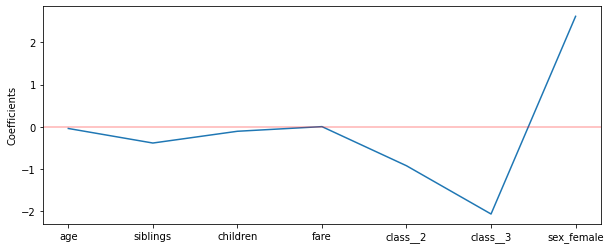

In [39]:
plt.figure(figsize=(10,4))
plt.plot(range(len(names)), logistic_coef)
plt.xticks(range(len(names)), names, rotation=0)
plt.ylabel('Coefficients')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.show()

#### Stimo una regressione Lasso per determinare l'importanza delle variabili del modello

In [27]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

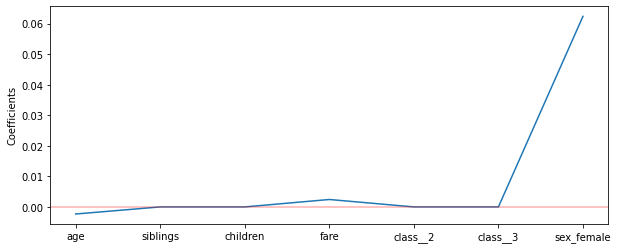

In [40]:
plt.figure(figsize=(10,4))
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=0)
plt.ylabel('Coefficients')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.show()